all tests passed


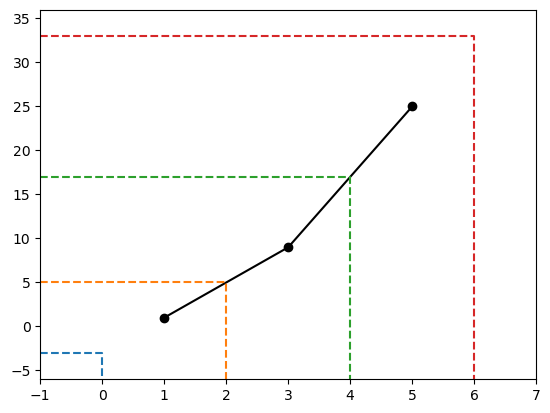

In [ ]:
## COMP1730/6730 - Homework 3

"""
ANU ID: u8041307
NAME: Kaeyryna Aryssa binti Kaeyda

By inputting my UID and name, I declare that this submission is my own work.
I have not used any AI tools to generate any part of this code or assist with the completion of this assignment.
I understand that doing so constitutes academic misconduct.
I am able to explain and justify all parts of this submission if asked.
https://www.anu.edu.au/students/academic-skills/academic-integrity
"""


## Implement the function below.
## (The statement "pass" is just a placeholder that does nothing: you
## should replace it.)
## You can define other functions if it helps you decompose the problem
## and write a better organised and/or more readable solution.

def linear_prediction(x, y, x_test):
    '''
    This function returns a number calculated unsing the linear prediction for a function f at a test point x. 
    It requires three arguments in the call function statement, which are:
        x: sequence of x values
        y: sequence of y values
        x_test: new test point
    '''

    #sort and pair x elements with its corresponding y elements
    pairs= sorted(zip(x,y))

    #separate the x and y that are sorted to individual sequence while maintaining the x-y relation of the unknown function
    x_sort, y_sort =zip(*pairs)
    
    #check for x_test that is equal to the value in sequence x
    for xi, yi in zip(x_sort, y_sort):
        if xi == x_test:
            return yi

    #the if-elif-else conditional statements below is for comparing x_test values with other values in the x sequence to choose appropriate x and y values for slope calculation   
    #check if x_test is smaller than x samples (extrapolate case)
    if x_test < x_sort[0]:
        x1, y1 = x_sort[0], y_sort[0]
        x2, y2 = x_sort[1], y_sort[1]
            
    #check if x_test is bigger than x samples (extrapolate case)
    elif x_test > x_sort[-1]:
        x1, y1 = x_sort[-2], y_sort[-2]
        x2, y2 = x_sort[-1], y_sort[-1]
            

    #check if x_test falls in sample range (interpolate case)
    else:
        for i in range(len(x_sort) - 1):
            if x_test > x_sort[i] and  x_test < x_sort[i+1]:
                x1 , y1= x_sort[i] , y_sort[i]
                x2 , y2= x_sort[i+1] , y_sort[i+1]
                break

    slope = (y2 -y1) / (x2 - x1)
    y_intercept= y1 - (slope * x1)
    f_x_test = (slope * x_test) + y_intercept
    return f_x_test

################################################################################
#               DO NOT MODIFY THE TEST FUNCTION
# The testing function below is provided if you want to test your code
# in your favourite IDE instead of using the Ed platform. They run the
# same set of test cases as when you click the "Test" button on Ed website
################################################################################

def test_linear_prediction():
    '''
    This function runs a number of tests of the linear_prediction function.
    If it works ok, you will just see the output ("all tests passed") at
    the end when you call this function; if some test fails, there will
    be an error message.
    '''

    assert abs(linear_prediction([1.0, 3.0, 5.0], [1.0, 9.0, 25.0], 0.5) - -1.0) < 1e-6
    assert abs(linear_prediction([1.0, 3.0, 5.0], [1.0, 9.0, 25.0], 2.0) - 5.0) < 1e-6
    assert abs(linear_prediction([1.0, 3.0, 5.0], [1.0, 9.0, 25.0], 4.0) - 17.0) < 1e-6
    assert abs(linear_prediction([1.0, 3.0, 5.0], (1.0, 9.0, 25.0), 6.0) - 33.0) < 1e-6
    assert abs(linear_prediction((1.0, 5.0, 3.0), [1.0, 25.0, 9.0], 1.25) - 2.0) < 1e-6
    assert abs(linear_prediction((1.0, 5.0, 3.0), (1.0, 25.0, 9.0), 2.5) - 7.0) < 1e-6

    # test that we get the right answer when x_test is exactly one
    # of the sample points:
    assert abs(linear_prediction([1.0, 3.0, 5.0], [1.0, 9.0, 25.0], 1) - 1.0) < 1e-6
    assert abs(linear_prediction([5.0, 1.0, 3.0], [25.0, 1.0, 9.0], 3) - 9.0) < 1e-6
    assert abs(linear_prediction([3.0, 1.0, 5.0], [9.0, 1.0, 25.0], 5) - 25.0) < 1e-6

    # we should get the same answer also if only the two adjacent
    # sample points are given:
    assert abs(linear_prediction([1.0, 3.0], [1.0, 9.0], 0) - -3) < 1e-6
    assert abs(linear_prediction([3.0, 1.0], [9.0, 1.0], 2.0) - 5.0) < 1e-6
    assert abs(linear_prediction([5.0, 3.0], [25.0, 9.0], 4.0) - 17.0) < 1e-6
    assert abs(linear_prediction([1.0, 3.0], [1.0, 9.0], 4.0) - 13.0) < 1e-6

    print("all tests passed")

import matplotlib.pyplot as plt

def plot_linear_prediction(x, y, x_tests):
    """
    This function visualizes linear_prediction results.
    It takes multiple x_test values as a sequence x_tests and
    data points specified in sequences x and y.
    Args:
        x: sequence of x-values
        y: sequence of corresponding y-values
        x_tests: sequence of testing x-values
    """
    y_tests = [ linear_prediction(x, y, x_test) for x_test in x_tests ]
    xlim_min = min(min(x), min(x_tests))-1
    ylim_min = min(min(y), min(y_tests))-3
    plt.xlim(xlim_min, max(max(x), max(x_tests))+1)
    plt.ylim(ylim_min, max(max(y), max(y_tests))+3)
    plt.plot(x, y, marker = "o", color = "black")
    for x_test, y_test in zip(x_tests, y_tests):
        plt.plot([xlim_min, x_test, x_test], [y_test, y_test, ylim_min], 
            linestyle = 'dashed')
    plt.show()

test_linear_prediction()
plot_linear_prediction([1.0, 3.0, 5.0], [1.0, 9.0, 25.0], [0.0, 2.0, 4.0, 6.0])